<a href="https://colab.research.google.com/github/omkar1872/Customer-Churn-Predictor/blob/main/Customer_Churn_Predictior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [123]:
df=pd.read_csv("/content/customer_churn_dataset.csv")
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [124]:
df.info()
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


(64374, 12)

In [125]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [126]:

df.dtypes

,0
CustomerID,int64
Age,int64
Gender,object
Tenure,int64
Usage Frequency,int64
Support Calls,int64
Payment Delay,int64
Subscription Type,object
Contract Length,object
Total Spend,int64


In [127]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [128]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [129]:
df.drop(columns=['CustomerID'],inplace=True)

In [130]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [131]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [132]:
df['Subscription Type'].unique()

array(['Basic', 'Standard', 'Premium'], dtype=object)

In [133]:
df['Last Interaction'].unique()

array([ 9, 20, 21, 18, 29, 14, 16,  8, 10,  3,  1, 24, 30, 15, 25, 22, 13,
       26, 12,  4, 27,  6, 17, 19,  5,  2, 11,  7, 28, 23])

In [134]:
# Encode Gender (binary category)
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
df['Gender'] = label_enc.fit_transform(df['Gender'])  # Male=1, Female=0
df['Subscription Type'] = label_enc.fit_transform(df['Subscription Type'])



In [135]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,0,25,14,4,27,0,Monthly,598,9,1
1,41,0,28,28,7,13,2,Monthly,584,20,0
2,47,1,27,10,2,29,1,Annual,757,21,0
3,35,1,9,12,5,17,1,Quarterly,232,18,0
4,53,0,58,24,9,2,2,Annual,533,18,0


In [136]:
# Map contract types to number of months
contract_map = {
    'Monthly': 1,
    'Quarterly': 3,
    'Annual': 12
}

df['Contract Length'] = df['Contract Length'].map(contract_map)


In [137]:
df.dtypes

,0
Age,int64
Gender,int64
Tenure,int64
Usage Frequency,int64
Support Calls,int64
Payment Delay,int64
Subscription Type,int64
Contract Length,int64
Total Spend,int64
Last Interaction,int64


In [138]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,0,25,14,4,27,0,1,598,9,1
1,41,0,28,28,7,13,2,1,584,20,0
2,47,1,27,10,2,29,1,12,757,21,0
3,35,1,9,12,5,17,1,3,232,18,0
4,53,0,58,24,9,2,2,12,533,18,0


In [140]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,0,25,14,4,27,0,1,598,9,1
1,41,0,28,28,7,13,2,1,584,20,0
2,47,1,27,10,2,29,1,12,757,21,0
3,35,1,9,12,5,17,1,3,232,18,0
4,53,0,58,24,9,2,2,12,533,18,0


In [146]:
print(df['Churn'].value_counts())
print("\nPercentage distribution:")
print(df['Churn'].value_counts(normalize=True) * 100)
df.columns

Churn
0    33881
1    30493
Name: count, dtype: int64

Percentage distribution:
Churn
0    52.631497
1    47.368503
Name: proportion, dtype: float64


Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Churn'],
      dtype='object')

In [143]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Scale the specified columns and assign the results back to the same columns
# Ensure the columns being assigned to match the columns being scaled
df[['Age','Tenure','Usage Frequency','Support Calls','Payment Delay','Total Spend','Last Interaction']] = scaler.fit_transform(df[['Age','Tenure','Usage Frequency','Support Calls','Payment Delay','Total Spend','Last Interaction']])

In [147]:

X=df.drop('Churn',axis=1)
Y=df['Churn']

In [148]:
X.shape

(64374, 10)

In [149]:
X.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,-1.434202,0,-0.409100,-0.122526,-0.449807,1.114538,0,1,0.218408,-0.752324
1,-0.069730,0,-0.233642,1.465424,0.513590,-0.467000,2,1,0.164742,0.521065
2,0.361155,1,-0.292128,-0.576225,-1.092072,1.340472,1,12,0.827900,0.636827
3,-0.500616,1,-1.344876,-0.349375,-0.128674,-0.015132,1,3,-1.184575,0.289540
4,0.792041,0,1.520939,1.011724,1.155855,-1.709637,2,12,-0.030756,0.289540


In [150]:
Y.head()

,Churn
0,1
1,0
2,0
3,0
4,0


In [151]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [152]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier()

In [153]:
y_pred=model.predict(X_test)

In [159]:
from sklearn.metrics import accuracy_score

# Training accuracy
train_pred = model.predict(X_train)
train_accuracy = accuracy_score(Y_train, train_pred)
print("Training Accuracy:", train_accuracy)

# Testing accuracy
test_pred = model.predict(X_test)
test_accuracy = accuracy_score(Y_test,test_pred)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 1.0
Testing Accuracy: 0.999378640776699


In [155]:
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(Y_test,y_pred))
accuracy=accuracy_score(Y_test,y_pred)
print(accuracy)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6793
           1       1.00      1.00      1.00      6082

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875

0.999378640776699


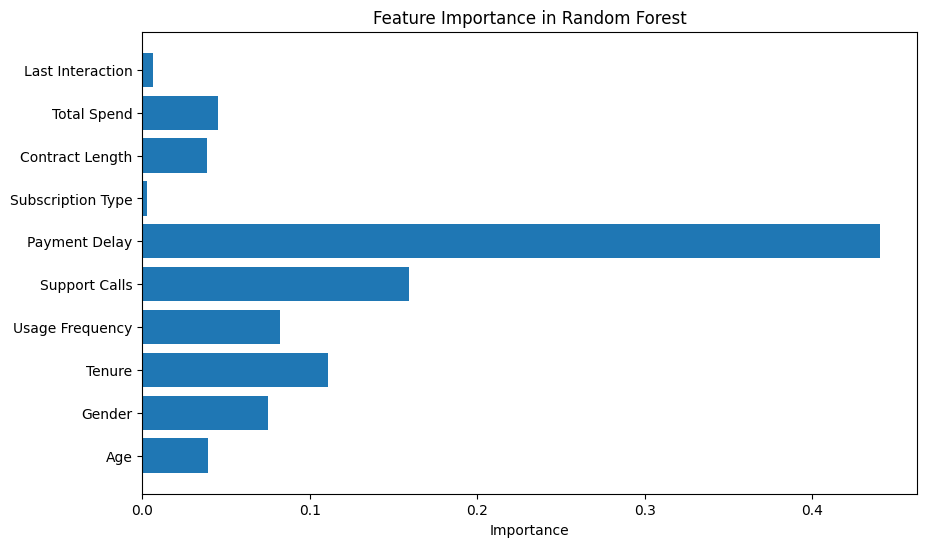

In [160]:
import matplotlib.pyplot as plt

feature_importance = model.feature_importances_
features = X_train.columns

plt.figure(figsize=(10,6))
plt.barh(features, feature_importance)
plt.xlabel("Importance")
plt.title("Feature Importance in Random Forest")
plt.show()


In [162]:
from google.colab import files

# Save DataFrame to CSV
df.to_csv('churn_dataset.csv', index=False)

# Download the CSV file
files.download('churn_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>